# POKEMON

### Analitika kitabxanalarının yüklənməsi və Datasetin Gətirilməsi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\Users\LENOVO\Downloads\Pokemon.xlsx")
df

,#,name,type1,type2,base_total,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,is_legendary,generation,capture_rate,base_happiness,percentage_male
0,1,Bulbasaur,grass,poison,318,45,49,49,65,65,45,0.7,6.9,0,1,45,70,88.1
1,2,Ivysaur,grass,poison,405,60,62,63,80,80,60,1.0,13.0,0,1,45,70,88.1
2,3,Venusaur,grass,poison,625,80,100,123,122,120,80,2.0,100.0,0,1,45,70,88.1
3,4,Charmander,fire,NaN,309,39,52,43,60,50,65,0.6,8.5,0,1,45,70,88.1
4,5,Charmeleon,fire,NaN,405,58,64,58,80,65,80,1.1,19.0,0,1,45,70,88.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Celesteela,steel,flying,570,97,101,103,107,101,61,9.2,999.9,1,7,25,0,NaN
796,797,Kartana,grass,steel,570,59,181,131,59,31,109,0.3,0.1,1,7,255,0,NaN
797,798,Guzzlord,dark,dragon,570,223,101,53,97,53,43,5.5,888.0,1,7,15,0,NaN
798,799,Necrozma,psychic,NaN,600,97,107,101,127,89,79,2.4,230.0,1,7,3,0,NaN


#### Datasetdə ən çox yayılmış Pokemon növü hansıdır? Bu tip nə qədər Pokemon var?

In [5]:
df['type1'].value_counts().sort_values(ascending = False).head(1)

type1
water    114
Name: count, dtype: int64

#### Digər növləri ilə müqayisədə həddindən artıq yüksək və ya aşağı statistikaya malik hər hansı Pokemon varmı?

In [16]:
attack_mean = df['attack'].mean()
attack_std = df['attack'].std()
upper_limit_attack = attack_mean + 3 * attack_std
lower_limit_attack = attack_mean - 3 * attack_std

outliers_attack = df[(df['attack'] > upper_limit_attack) | (df['attack'] < lower_limit_attack)]

print(outliers_attack[['name', 'attack']])

          name  attack
213  Heracross     185
382    Groudon     180
383   Rayquaza     180
796    Kartana     181


<Axes: >

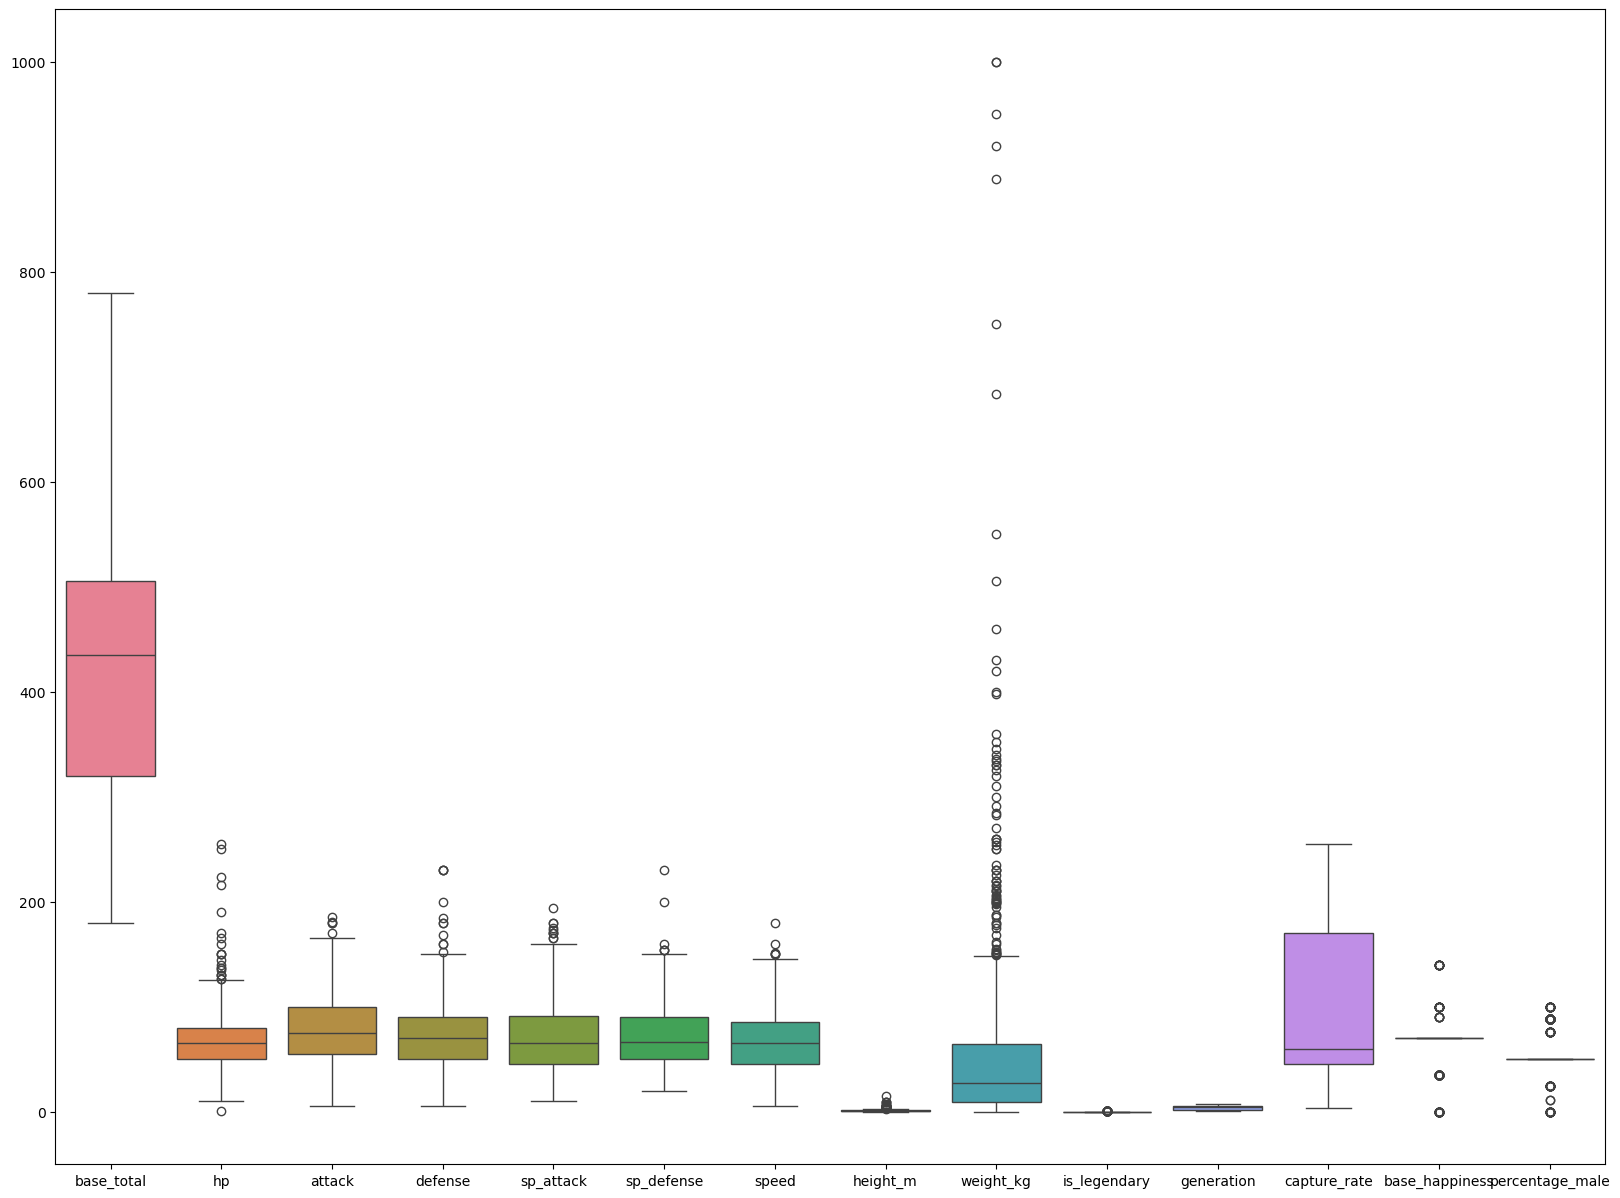

In [20]:
plt.figure(figsize=(20,15))
sns.boxplot(df[['base_total','hp', 'attack','defense','sp_attack','sp_defense','speed','height_m','weight_kg',	'is_legendary',	'generation','capture_rate','base_happiness','percentage_male']])

#### Pokemonun capture rate ilə onun base total arasında əlaqə varmı? Bəs onun nadirliyi (legendary və ya deyil)?

In [22]:
df['capture_rate'].corr(df['base_total'])

-0.7121201962428769

In [32]:
df['capture_rate'].corr(df['is_legendary'])

-0.3282121307256086

#### Hansı Pokemon ən yüksək hücum statistikasına malikdir?

In [39]:
df.groupby('name')['attack'].max().sort_values(ascending = False).head(1)

name
Heracross    185
Name: attack, dtype: int64

#### Base total ilə HP, Attack, Defense, Special Attack, Special Defense və Speed kimi digər atributların hər biri arasında correlation nədir?

In [41]:
df[['base_total','hp', 'attack','defense','sp_attack','sp_defense','speed','height_m','weight_kg',	'is_legendary',	'generation','capture_rate','base_happiness','percentage_male']].corr()['base_total']

base_total         1.000000
hp                 0.621062
attack             0.729998
defense            0.630151
sp_attack          0.740986
sp_defense         0.717958
speed              0.547575
height_m           0.536017
weight_kg          0.458376
is_legendary       0.485811
generation         0.083241
capture_rate      -0.712120
base_happiness    -0.275044
percentage_male    0.098462
Name: base_total, dtype: float64

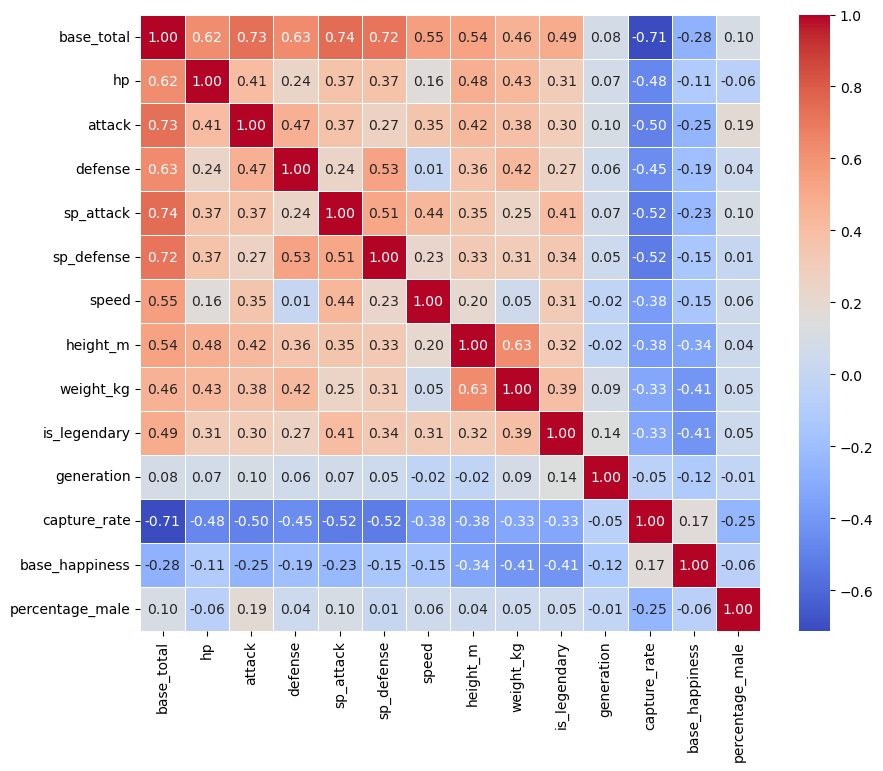

In [43]:
corr = df[['base_total','hp', 'attack','defense','sp_attack','sp_defense','speed','height_m','weight_kg','is_legendary','generation','capture_rate','base_happiness','percentage_male']].corr()

plt.figure(figsize = (10, 8))  
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths =.5)
plt.show()

#### Əfsanəvi və əfsanəvi olmayan Pokemonun ortalama hücum  arasında əhəmiyyətli fərq varmı?

In [51]:
mean_attack = df.groupby('is_legendary')['attack'].mean().reset_index()
print(mean_attack)

legendary_attack = df[df['is_legendary'] == 1]['attack'].mean()
non_legendary_attack = df[df['is_legendary'] == 0]['attack'].mean()
print(legendary_attack-non_legendary_attack)

   is_legendary      attack
0             0   74.806849
1             1  109.357143
34.55029354207437


#### Hansı tip 1 və tip 2 kombinasiyaları Pokemonlar arasında ən çox yayılmışdır?

In [57]:
df['Type'] = df['type1'] +' '+ df['type2']
df['Type'].value_counts().sort_values(ascending = False)

Type
normal flying     26
grass poison      14
bug flying        13
bug poison        11
water ground       9
                  ..
rock dark          1
ground steel       1
water steel        1
fighting steel     1
rock poison        1
Name: count, Length: 148, dtype: int64

#### Pokemonun çəkisi və boyu arasında korrelyasiya varmı?

In [59]:
df['weight_kg'].corr(df['height_m'])

0.6266230704400672

#### Hansı nəsil (generation) ən yüksək ortalama sürətə malikdir?

In [61]:
df.groupby('generation')['speed'].mean().sort_values(ascending = False).head(1)

generation
1    70.152318
Name: speed, dtype: float64

#### Base total paylanması əfsanəvi və əfsanəvi olmayan Pokemon arasında necə dəyişir?

is_legendary
0    410.358904
1    615.257143
Name: base_total, dtype: float64


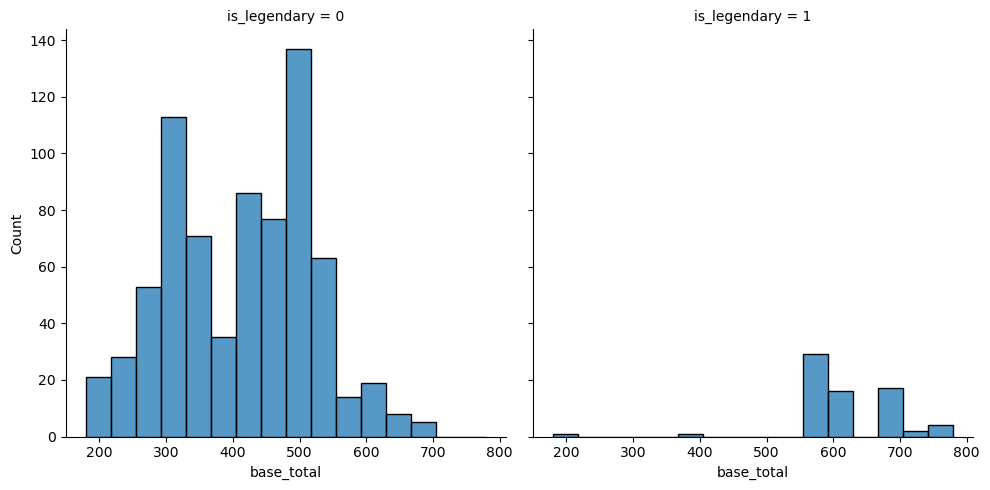

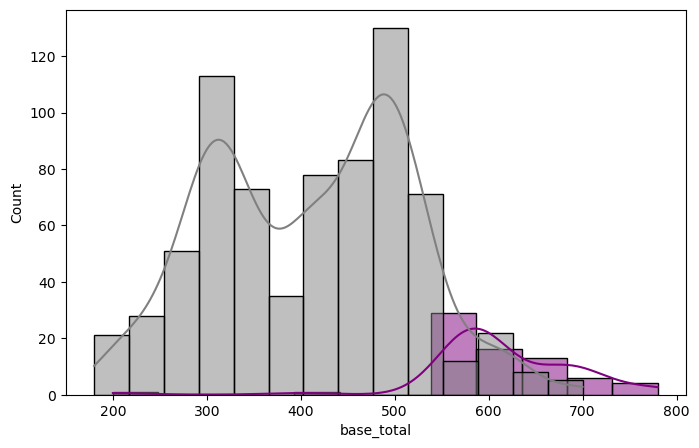

In [63]:
base_total_lg = df.groupby('is_legendary')['base_total'].mean()
print(base_total_lg)
sns.displot(df, x = 'base_total', col = 'is_legendary')

legendary_base_total = df[df['is_legendary'] == 1]['base_total']
non_legendary_base_total = df[df['is_legendary'] == 0]['base_total']

plt.figure(figsize=(8, 5))
sns.histplot(legendary_base_total, color = 'purple', label = 'Legendary', kde = True)
sns.histplot(non_legendary_base_total, color = 'grey', label = 'Non-Legendary', kde = True)
plt.show()

#### Müxtəlif Pokemon tipləri arasında Defense paylanmasında əhəmiyyətli fərq varmı?

type1
steel       120.208333
rock         97.090909
dragon       86.259259
ground       83.906250
ghost        79.518519
water        73.482456
ice          71.913043
grass        70.871795
bug          70.847222
dark         70.517241
poison       70.031250
psychic      69.264151
fairy        68.166667
fire         67.788462
fighting     66.392857
flying       65.000000
electric     61.820513
normal       59.695238
Name: defense, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3680\3140472757.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'type1', y = 'defense', palette = 'plasma')


<Axes: xlabel='type1', ylabel='defense'>

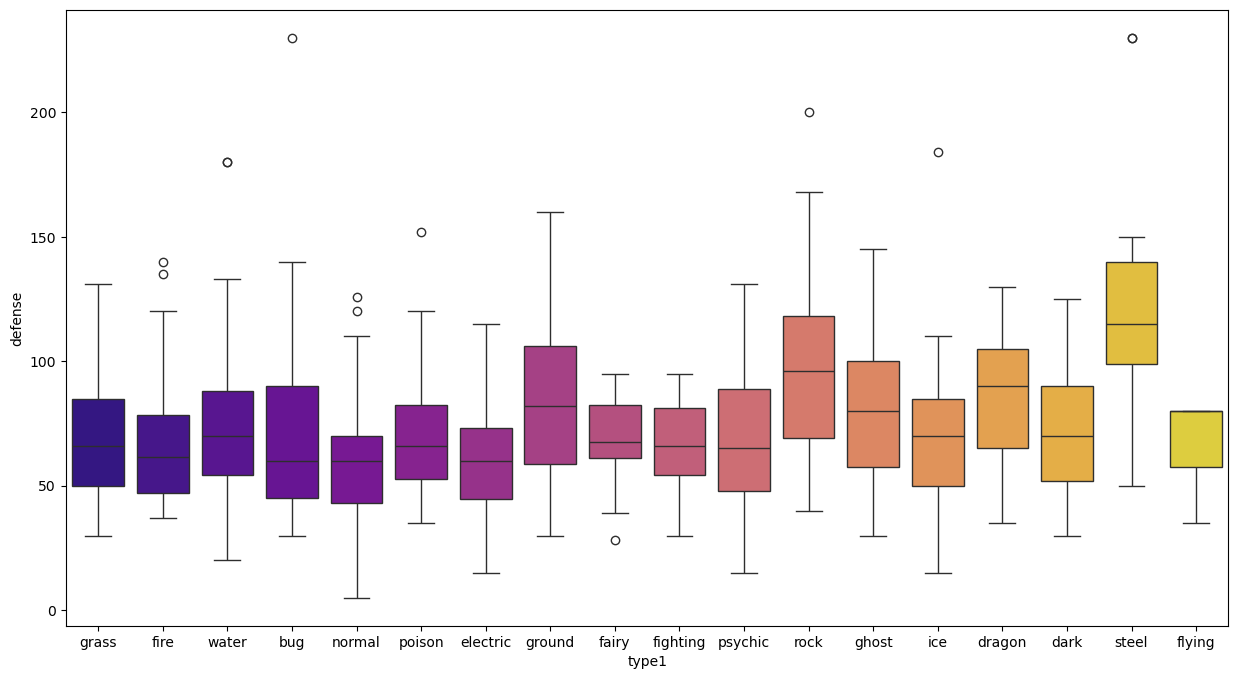

In [69]:
type_defense = df.groupby('type1')['defense'].mean().sort_values(ascending = False)
print(type_defense)

plt.figure(figsize = (15, 8))
sns.boxplot(data = df, x = 'type1', y = 'defense', palette = 'plasma')

#### Pokemonun adını input kimi qəbul edən və onun statistikalarının olduğu lüğətini qaytaran funksiya yazın.

In [91]:
def pk_stat():
    pk_name = input('Pokemonun adını daxil edin: ')
    pk_data = df[df['name'] == pk_name]
    if pk_data.empty:
        print('Bu adda Pokemona rast gəlinmədi')
        return
    numeric_data = pk_data.select_dtypes(include = 'number')
    sts = numeric_data.agg([np.mean, np.median, np.min, np.max, np.std])
    print(sts)
pk_stat()

Pokemonun adını daxil edin:  Charmander


          #  base_total    hp  attack  defense  sp_attack  sp_defense  speed  \
mean    4.0       309.0  39.0    52.0     43.0       60.0        50.0   65.0   
median  4.0       309.0  39.0    52.0     43.0       60.0        50.0   65.0   
min     4.0       309.0  39.0    52.0     43.0       60.0        50.0   65.0   
max     4.0       309.0  39.0    52.0     43.0       60.0        50.0   65.0   
std     NaN         NaN   NaN     NaN      NaN        NaN         NaN    NaN   

        height_m  weight_kg  is_legendary  generation  capture_rate  \
mean         0.6        8.5           0.0         1.0          45.0   
median       0.6        8.5           0.0         1.0          45.0   
min          0.6        8.5           0.0         1.0          45.0   
max          0.6        8.5           0.0         1.0          45.0   
std          NaN        NaN           NaN         NaN           NaN   

        base_happiness  percentage_male  
mean              70.0             88.1  
median  

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3680\3205004524.py:8: FutureWarning: The provided callable <function mean at 0x000002A2B0726AC0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sts = numeric_data.agg([np.mean, np.median, np.min, np.max, np.std])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3680\3205004524.py:8: FutureWarning: The provided callable <function median at 0x000002A2B084D580> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sts = numeric_data.agg([np.mean, np.median, np.min, np.max, np.std])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3680\3205004524.py:8: FutureWarning: The provided callable <function min at 0x000002A2B0726200> is currently using Series.min. In a future version of pandas, the provided callable will be used 

#### Percentage_male sütununda boş dəyərləri öz tipinin ortalaması ilə doldurun

In [97]:
fill = df.groupby('type1')['percentage_male'].transform('mean')
df['percentage_male'].fillna(fill) 

0      88.100000
1      88.100000
2      88.100000
3      88.100000
4      88.100000
         ...    
795    50.000000
796    58.978378
797    50.550000
798    51.058333
799    50.000000
Name: percentage_male, Length: 800, dtype: float64

#### Daha çox kişiyə yaxın olan pokemonlar daha güclüdür, yoxsa qadına yaxın olanlar?

In [103]:
def güclü(x):
    if x > 50:
        return 'Kişiyə yaxın olan pokemonlar'
    else:
        return 'Qadına yaxın olan pokemonlar'
df['percentage_male'].apply(güclü).value_counts()

percentage_male
Qadına yaxın olan pokemonlar    651
Kişiyə yaxın olan pokemonlar    149
Name: count, dtype: int64

#### Əfsanəvi və ya əfsanəvi olmayan pokemonların ortalama çəkiləri və boyları arasında önəmli bir fərq var?

In [105]:
 df.groupby(['is_legendary'])[['weight_kg','height_m']].mean()

,weight_kg,height_m
is_legendary,,
0,48.018425,1.056681
1,199.350725,2.281159


#### Hansı tip1 və tip2 kombinasiyası daha xoşbəxtdir?

In [109]:
df.groupby('Type')['base_happiness'].sum().sort_values(ascending = False).head(1)

Type
normal flying    1785
Name: base_happiness, dtype: int64

#### Tiplər üzrə ortalama çəki və boyları tapın

In [113]:
df.groupby('Type')[['weight_kg','height_m']].mean()

,weight_kg,height_m
Type,,
bug electric,17.600000,0.725
bug fairy,0.350000,0.150
bug fighting,137.533333,1.900
bug fire,37.400000,1.350
bug flying,27.092308,1.100
...,...,...
water ice,157.500000,1.900
water poison,34.800000,1.000
water psychic,58.600000,1.360


### Mən oynamaq üçün ən ideal pokemonu seçmək istəsəm, hansını seçməliyəm? Bunun üçün özünüzə uyğun xüsusi bir analiz aparın və seçdiyiniz pokemonu əsaslandırın

In [124]:
df.sort_values((['speed','attack','defense']),ascending=False)[['name','speed', 'attack','defense']].head(1)

,name,speed,attack,defense
385,Deoxys,180,95,90


In [126]:
#Mənə görə ən ideal pokemon Deoxys-dir. Çünki burda əsas 3 faktora nəzər yetirdim. Və onlar arasında sürəti, hücumu və müdafiəsi ən yüksək olan Deoxy oldu. 

#### Apardığınız analizlərin nəticəsinə uyğun olaraq vizuallaşdırmalar aparın və bir dashboard qurun

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3680\307902909.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'type1', y = 'defense', palette = 'coolwarm')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3680\307902909.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = mean_attack, x = 'is_legendary', y = 'attack', palette = ['blue', 'red'])


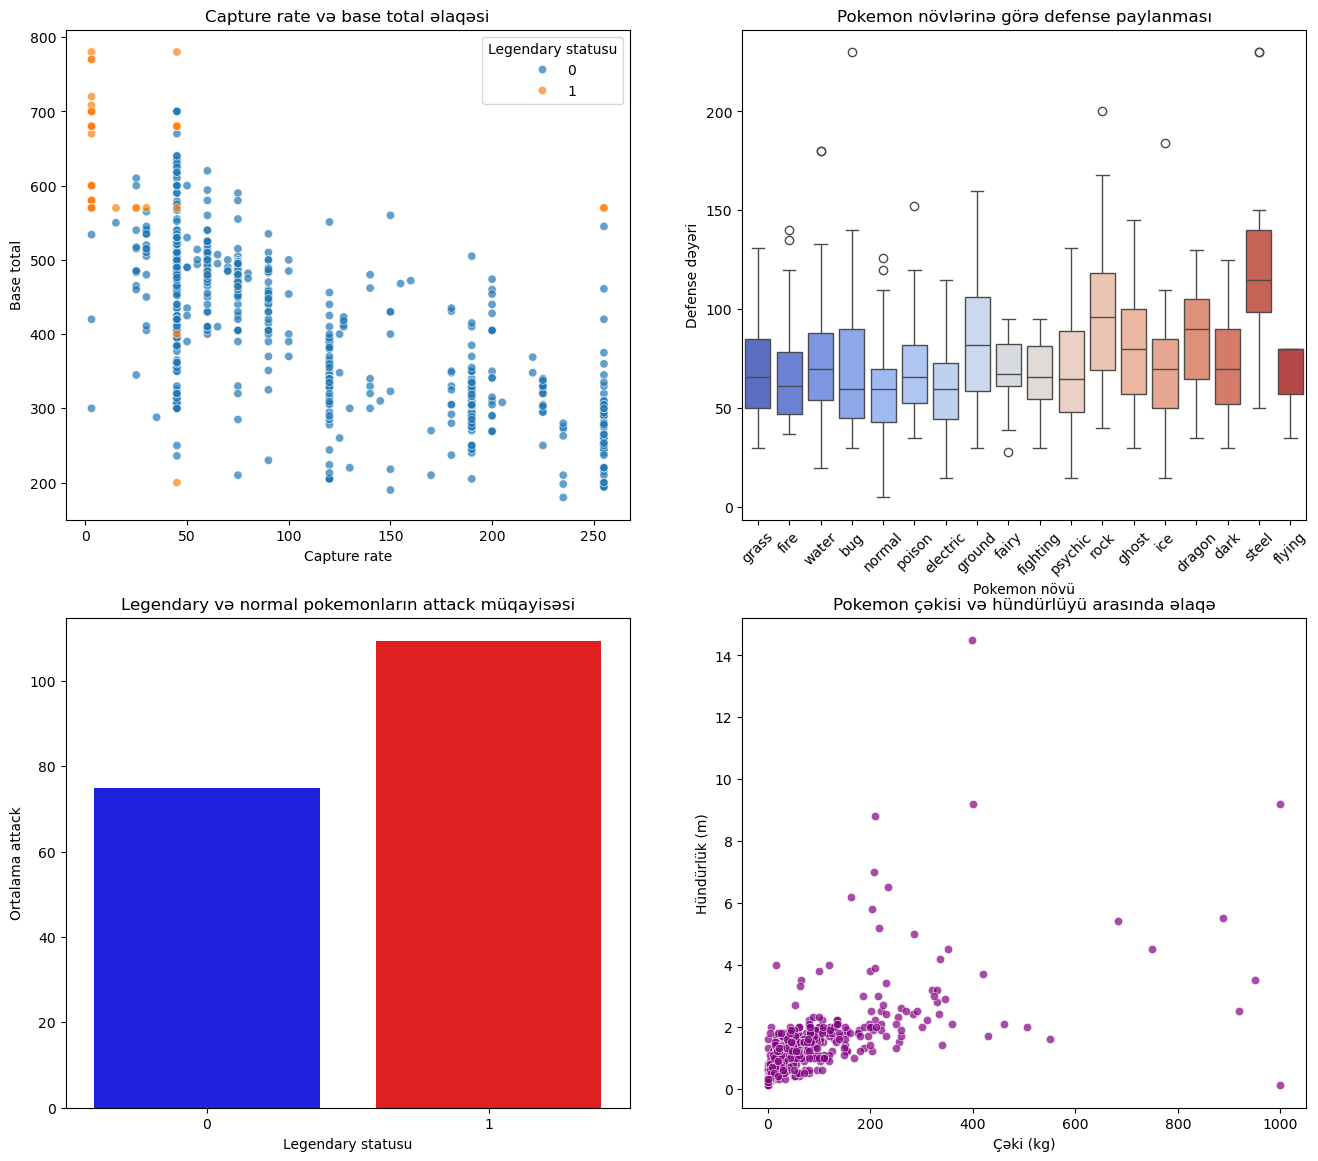

In [147]:
plt.figure(figsize = (16, 14))

plt.subplot(2,2,1)
sns.scatterplot(data = df, x = 'capture_rate', y = 'base_total', hue = 'is_legendary', alpha = .7)
plt.title('Capture rate və base total əlaqəsi')
plt.xlabel('Capture rate')
plt.ylabel('Base total')
plt.legend(title='Legendary statusu')

plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'type1', y = 'defense', palette = 'coolwarm')
plt.xlabel('Pokemon növü')
plt.ylabel('Defense dəyəri')
plt.title('Pokemon növlərinə görə defense paylanması')
plt.xticks(rotation = 45)

plt.subplot(2,2,3)
sns.barplot(data = mean_attack, x = 'is_legendary', y = 'attack', palette = ['blue', 'red'])
plt.xlabel('Legendary statusu')
plt.ylabel('Ortalama attack')
plt.title('Legendary və normal pokemonların attack müqayisəsi')

plt.subplot(2,2,4)
sns.scatterplot(data = df, x = 'weight_kg', y = 'height_m', color = 'purple', alpha = .7)
plt.title('Pokemon çəkisi və hündürlüyü arasında əlaqə')
plt.xlabel('Çəki (kg)')
plt.ylabel('Hündürlük (m)')

plt.show()